# Advanced Quantum Mechanics

This notebook explores advanced features of the quantum simulation module.

## Topics
- Quantum gates (Hadamard, CNOT, rotations)
- Multi-qubit entanglement
- Measurement statistics
- Observer decoherence
- Emergent physics


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sim.quantum import QuantumFabric, EmergentLaws, HUMAN_OBSERVER


## 1. Quantum Gates and State Manipulation

Create and manipulate quantum states using various gates.


In [14]:
# Create a 4-qubit system
qf = QuantumFabric(num_qubits=4)
print(f"Initial state: {qf.get_state_info()}")

# Apply Hadamard gates to create superposition
for i in range(4):
    qf.apply_hadamard(i)

print(f"\nAfter Hadamard on all qubits:")
print(f"State: {qf.get_state_info()}")
print(f"Number of non-zero amplitudes: {np.sum(np.abs(qf.state) > 1e-10)}")

# Check probabilities for each qubit
for i in range(4):
    p0, p1 = qf.get_qubit_probabilities(i)
    print(f"Qubit {i}: P(|0⟩)={p0:.4f}, P(|1⟩)={p1:.4f}")


[17:07:58] INFO     gpu: Using backend: NumPy (CPU)
Initial state: System of 4 qubits, state norm: 1.000000, coherence: 1.000000

After Hadamard on all qubits:
State: System of 4 qubits, state norm: 1.000000, coherence: 1.000000
Number of non-zero amplitudes: 16
Qubit 0: P(|0⟩)=0.5000, P(|1⟩)=0.5000
Qubit 1: P(|0⟩)=0.5000, P(|1⟩)=0.5000
Qubit 2: P(|0⟩)=0.5000, P(|1⟩)=0.5000
Qubit 3: P(|0⟩)=0.5000, P(|1⟩)=0.5000


## 2. Creating Bell States

Bell states are maximally entangled two-qubit states.


In [15]:
# Create Bell state |Φ⁺⟩ = (|00⟩ + |11⟩)/√2
qf_bell = QuantumFabric(num_qubits=2)
# apply_entanglement_operator with use_hadamard=True applies H then CNOT
qf_bell.apply_entanglement_operator([(0, 1)], use_hadamard=True)

print("Bell state |Φ⁺⟩:")
probs = qf_bell.get_probability_distribution()
n_qubits = 2
for i, prob in enumerate(probs):
    if prob > 0.01:
        state_str = format(i, f'0{n_qubits}b')
        print(f"  |{state_str}⟩: {prob:.4f}")

print(f"\nEntanglement entropy: {qf_bell.get_entanglement_entropy():.4f} (max = 1.0)")


[17:07:58] INFO     gpu: Using backend: NumPy (CPU)
Bell state |Φ⁺⟩:
  |00⟩: 0.5000
  |11⟩: 0.5000

Entanglement entropy: 1.0000 (max = 1.0)


## 3. Measurement Statistics

Run multiple measurements to verify quantum statistics.


[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] I

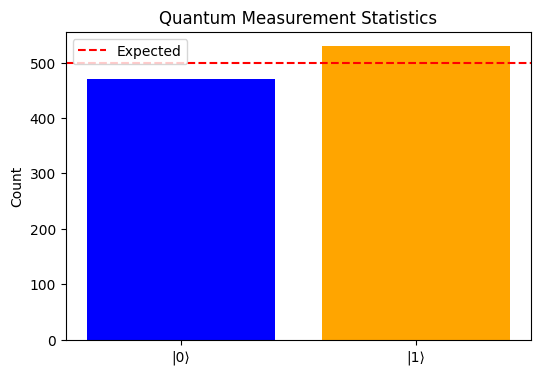

In [16]:
# Measurement statistics on a superposition state
n_measurements = 1000
results = {'0': 0, '1': 0}

for _ in range(n_measurements):
    qf_test = QuantumFabric(num_qubits=1)
    qf_test.apply_hadamard(0)
    result = qf_test.measure(0)
    results[str(result)] += 1

print(f"Measurement results over {n_measurements} trials:")
print(f"  |0⟩: {results['0']} ({results['0']/n_measurements:.1%})")
print(f"  |1⟩: {results['1']} ({results['1']/n_measurements:.1%})")
print(f"  Expected: 50% each")

# Visualize
plt.figure(figsize=(6, 4))
plt.bar(['|0⟩', '|1⟩'], [results['0'], results['1']], color=['blue', 'orange'])
plt.axhline(y=n_measurements/2, color='red', linestyle='--', label='Expected')
plt.ylabel('Count')
plt.title('Quantum Measurement Statistics')
plt.legend()
plt.show()


## 4. Entanglement Scaling

Explore how entanglement entropy scales with system size.


[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)
[17:07:59] INFO     gpu: Using backend: NumPy (CPU)


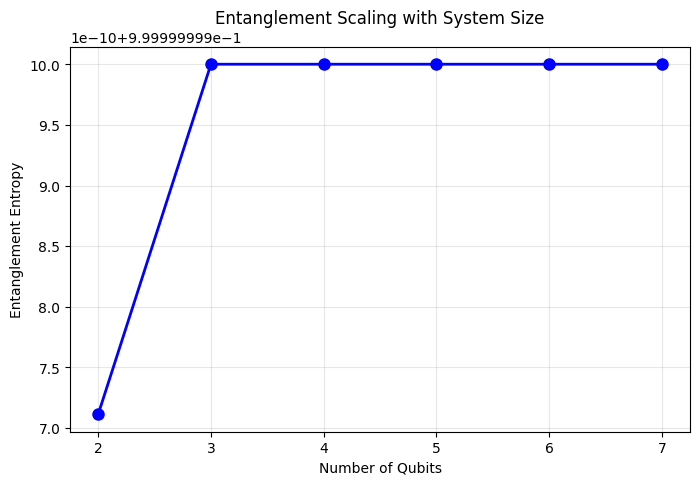

Entanglement entropy by system size:
  2 qubits: S = 1.0000
  3 qubits: S = 1.0000
  4 qubits: S = 1.0000
  5 qubits: S = 1.0000
  6 qubits: S = 1.0000
  7 qubits: S = 1.0000


In [17]:
# Entanglement vs system size
n_qubits_range = range(2, 8)
entropies = []

for n in n_qubits_range:
    qf = QuantumFabric(num_qubits=n)
    # Create chain entanglement
    pairs = [(i, i+1) for i in range(n-1)]
    qf.apply_entanglement_operator(pairs)
    entropies.append(qf.get_entanglement_entropy())

plt.figure(figsize=(8, 5))
plt.plot(list(n_qubits_range), entropies, 'bo-', markersize=8, linewidth=2)
plt.xlabel('Number of Qubits')
plt.ylabel('Entanglement Entropy')
plt.title('Entanglement Scaling with System Size')
plt.grid(True, alpha=0.3)
plt.show()

print("Entanglement entropy by system size:")
for n, e in zip(n_qubits_range, entropies):
    print(f"  {n} qubits: S = {e:.4f}")


## 5. Observer Decoherence

Simulate quantum decoherence caused by observation.


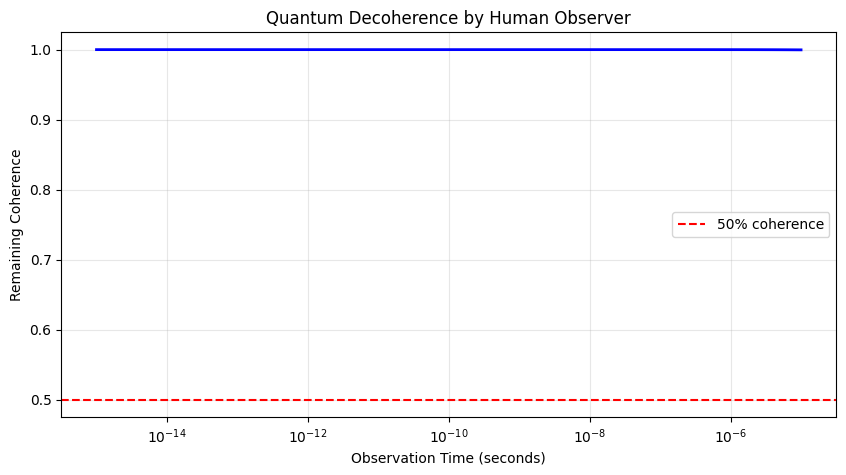

Decoherence time (50% loss): ~1.00e-05 seconds


In [18]:
# Observer decoherence over time
observation_times = np.logspace(-15, -5, 50)
coherence_values = []

initial_coherence = 1.0
for t in observation_times:
    remaining_coherence = HUMAN_OBSERVER.observe_system(initial_coherence, observation_time=t)
    coherence_values.append(remaining_coherence)

plt.figure(figsize=(10, 5))
plt.semilogx(observation_times, coherence_values, 'b-', linewidth=2)
plt.axhline(y=0.5, color='r', linestyle='--', label='50% coherence')
plt.xlabel('Observation Time (seconds)')
plt.ylabel('Remaining Coherence')
plt.title('Quantum Decoherence by Human Observer')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find decoherence time
decoherence_idx = np.argmin(np.abs(np.array(coherence_values) - 0.5))
print(f"Decoherence time (50% loss): ~{observation_times[decoherence_idx]:.2e} seconds")


## 6. Emergent Physics

Explore emergent phenomena from quantum mechanics.


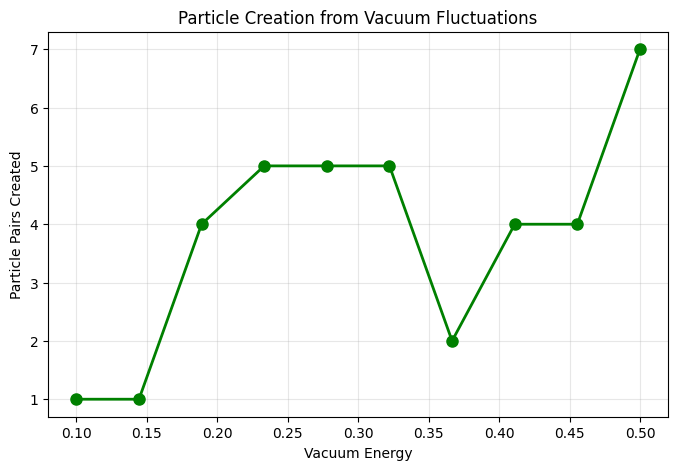

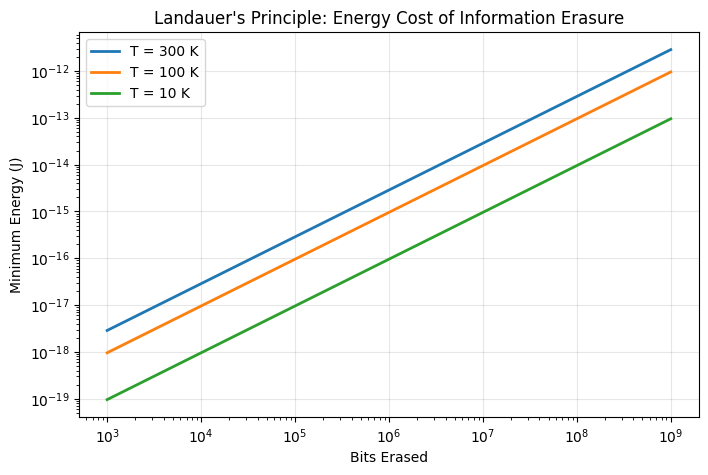

In [19]:
# Particle creation from vacuum
vacuum_energies = np.linspace(0.1, 0.5, 10)
particle_counts = []

for E in vacuum_energies:
    particles = EmergentLaws.simulate_particle_creation(vacuum_energy=E)
    particle_counts.append(len(particles))

plt.figure(figsize=(8, 5))
plt.plot(vacuum_energies, particle_counts, 'go-', markersize=8, linewidth=2)
plt.xlabel('Vacuum Energy')
plt.ylabel('Particle Pairs Created')
plt.title('Particle Creation from Vacuum Fluctuations')
plt.grid(True, alpha=0.3)
plt.show()

# Landauer's principle
bits_range = np.logspace(3, 9, 20)
temps = [300, 100, 10]  # Kelvin

plt.figure(figsize=(8, 5))
for T in temps:
    energies = [EmergentLaws.landauer_principle(bits_erased=b, temperature=T) for b in bits_range]
    plt.loglog(bits_range, energies, '-', linewidth=2, label=f'T = {T} K')

plt.xlabel('Bits Erased')
plt.ylabel('Minimum Energy (J)')
plt.title("Landauer's Principle: Energy Cost of Information Erasure")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()
